In [276]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

In [277]:
df = pd.read_csv("datasets/train.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [278]:
df.shape

(381109, 12)

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [280]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [281]:
X = df.drop("Response",axis =1)
y = df["Response"]
X.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39


In [282]:
print(X['Gender'].unique())
print(X['Vehicle_Age'].unique())
print(X['Vehicle_Damage'].unique())

['Male' 'Female']
['> 2 Years' '1-2 Year' '< 1 Year']
['Yes' 'No']


In [283]:
X = pd.get_dummies(X)
X

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,1,44,1,28.0,0,40454.0,26.0,217,False,True,False,False,True,False,True
1,2,76,1,3.0,0,33536.0,26.0,183,False,True,True,False,False,True,False
2,3,47,1,28.0,0,38294.0,26.0,27,False,True,False,False,True,False,True
3,4,21,1,11.0,1,28619.0,152.0,203,False,True,False,True,False,True,False
4,5,29,1,41.0,1,27496.0,152.0,39,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,74,1,26.0,1,30170.0,26.0,88,False,True,True,False,False,True,False
381105,381106,30,1,37.0,1,40016.0,152.0,131,False,True,False,True,False,True,False
381106,381107,21,1,30.0,1,35118.0,160.0,161,False,True,False,True,False,True,False
381107,381108,68,1,14.0,0,44617.0,124.0,74,True,False,False,False,True,False,True


In [284]:
X = X.astype("float")
y = y.astype("int")

In [285]:
scaler = StandardScaler()
scaler.fit_transform(X)
X

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,1.0,44.0,1.0,28.0,0.0,40454.0,26.0,217.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,2.0,76.0,1.0,3.0,0.0,33536.0,26.0,183.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,3.0,47.0,1.0,28.0,0.0,38294.0,26.0,27.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,4.0,21.0,1.0,11.0,1.0,28619.0,152.0,203.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,29.0,1.0,41.0,1.0,27496.0,152.0,39.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105.0,74.0,1.0,26.0,1.0,30170.0,26.0,88.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
381105,381106.0,30.0,1.0,37.0,1.0,40016.0,152.0,131.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
381106,381107.0,21.0,1.0,30.0,1.0,35118.0,160.0,161.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
381107,381108.0,68.0,1.0,14.0,0.0,44617.0,124.0,74.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [286]:
X.shape,y.shape

((381109, 15), (381109,))

In [287]:
y.value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [288]:
X = X.values
y = y.values

In [289]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=.05,random_state=42)

In [290]:
class_weights = compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(y_train), 
    y=y_train
)

class_weight_dict = dict(zip(np.unique(y_train), class_weights))

print(class_weight_dict)

{0: 0.5696831326097423, 1: 4.087668789233618}


In [291]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(X_train.shape[1],)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001),
              metrics = ['accuracy'])

In [292]:
print(np.unique(y_train))

[0 1]


In [293]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val,y_val),
                    class_weight = class_weight_dict)

Epoch 1/10
11315/11315 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.1877 - loss: 61798179888168960.0000 - val_accuracy: 0.8728 - val_loss: 0.6931
Epoch 2/10
11315/11315 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.3775 - loss: 0.6937 - val_accuracy: 0.1272 - val_loss: 0.6931
Epoch 3/10
11315/11315 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.6145 - loss: 0.6918 - val_accuracy: 0.1272 - val_loss: 0.6932
Epoch 4/10
11315/11315 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.3841 - loss: 0.6932 - val_accuracy: 0.1272 - val_loss: 0.6932
Epoch 5/10
11315/11315 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.3208 - loss: 0.6935 - val_accuracy: 0.1272 - val_loss: 0.6932
Epoch 6/10
11315/11315 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.7755 - loss: 0.6921 - val_accuracy: 0.1272 - val_loss: 0.6932
Epoch 7/10
11315/11315 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.3651 - loss: 0.6937 - val_accuracy: 0.1272 - val_loss: 0.6932
Epoch 8/10
11315/11315 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/s

In [294]:
y_pred = model.predict(X_val)

596/596 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step


In [295]:
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_pred,y_val))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.13      0.23     19056

    accuracy                           0.13     19056
   macro avg       0.50      0.06      0.11     19056
weighted avg       1.00      0.13      0.23     19056



c:\Users\Sanju\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sanju\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sanju\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<function matplotlib.pyplot.show(close=None, block=None)>

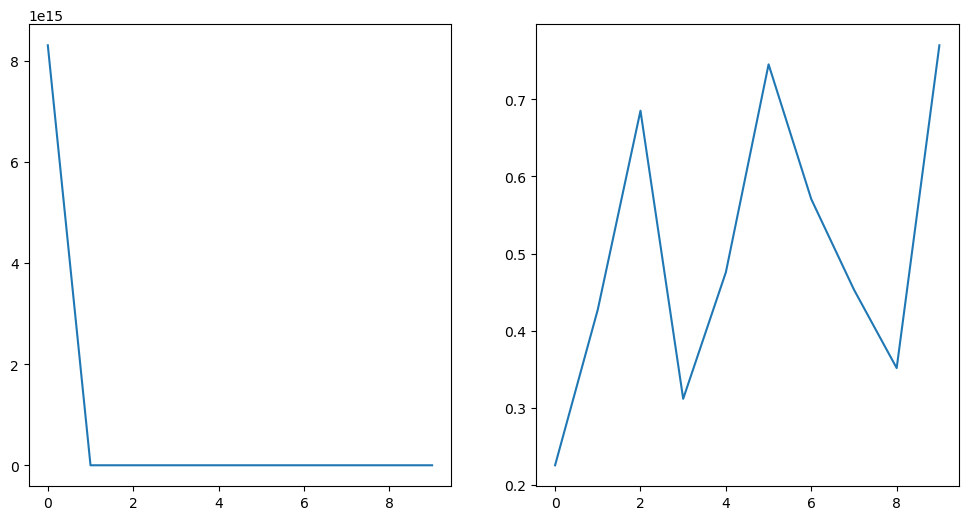

In [296]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.show